# Business Insight

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45663 entries, 0 to 45662
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45663 non-null  int64  
 1   job        45663 non-null  object 
 2   marital    45663 non-null  object 
 3   education  45663 non-null  object 
 4   default    45663 non-null  object 
 5   balance    45663 non-null  int64  
 6   housing    45663 non-null  object 
 7   loan       45663 non-null  object 
 8   contact    45663 non-null  object 
 9   day        45663 non-null  int64  
 10  month      45663 non-null  object 
 11  duration   45317 non-null  float64
 12  campaign   45281 non-null  float64
 13  pdays      45446 non-null  float64
 14  previous   45395 non-null  float64
 15  poutcome   45663 non-null  object 
 16  y          45355 non-null  float64
dtypes: float64(5), int64(3), object(9)
memory usage: 5.9+ MB


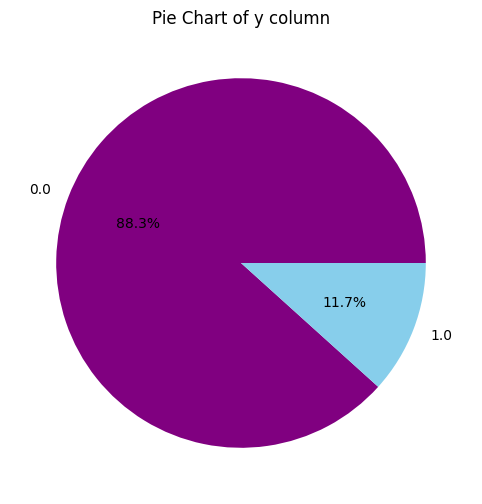

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing nilai dalam kolom 'y'
counts = data['y'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['purple', 'skyblue'])
plt.title('Pie Chart of y column')
plt.show()


## Dari data, hanya 11,6% nasabah yang sudah membuka deposito berjangka. Artinya hanya ada 5.300 nasabah yang berlangganan, dan 40.055 lainnya belum berlangganan.


In [ ]:
y_yes = data[data['y']== 1]
y_no = data[data['y']== 0]

jumlah_y_yes = y_yes.shape[0]
jumlah_y_no = y_no.shape[0]

print("Jumlah baris dalam DataFrame df_yes (y = 'yes') adalah:", jumlah_y_yes)
print("Jumlah baris dalam DataFrame df_yes (y = 'no') adalah:", jumlah_y_no)

Jumlah baris dalam DataFrame df_yes (y = 'yes') adalah: 5300
Jumlah baris dalam DataFrame df_yes (y = 'no') adalah: 40055


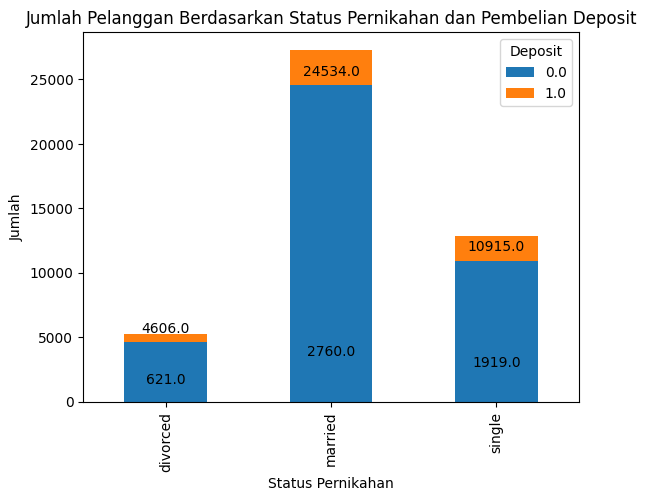

In [ ]:
marital_counts = data.groupby(['marital', 'y']).size().unstack()
ax = marital_counts.plot(kind='bar', stacked=True)
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah')
plt.title('Jumlah Pelanggan Berdasarkan Status Pernikahan dan Pembelian Deposit')

# Menambahkan label angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(title='Deposit')
plt.show()


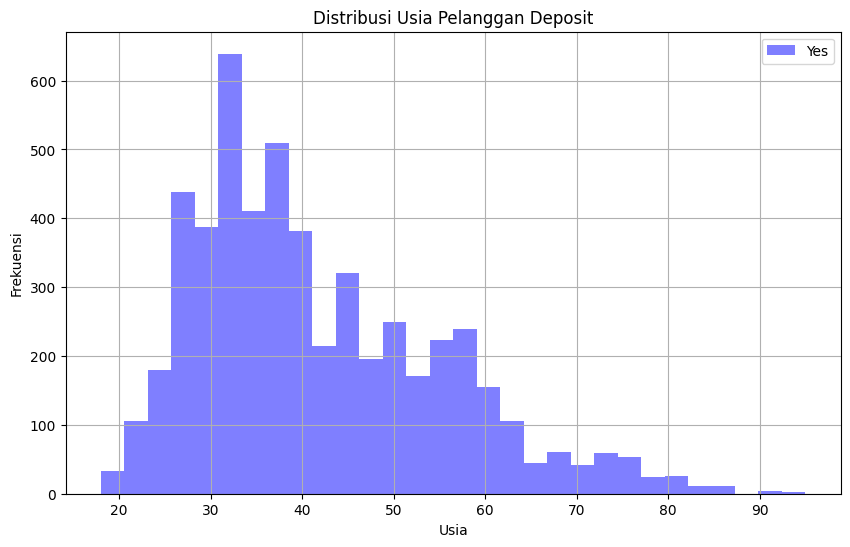

In [ ]:
plt.figure(figsize=(10, 6))
data[data['y'] == 1]['age'].hist(alpha=0.5, color='blue', bins=30, label='Yes')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.title('Distribusi Usia Pelanggan Deposit')
plt.legend()

## Nasabah yang paling banyak membuka deposito berjangka berusia sekitar 30-40 tahun dan sudah menikah.


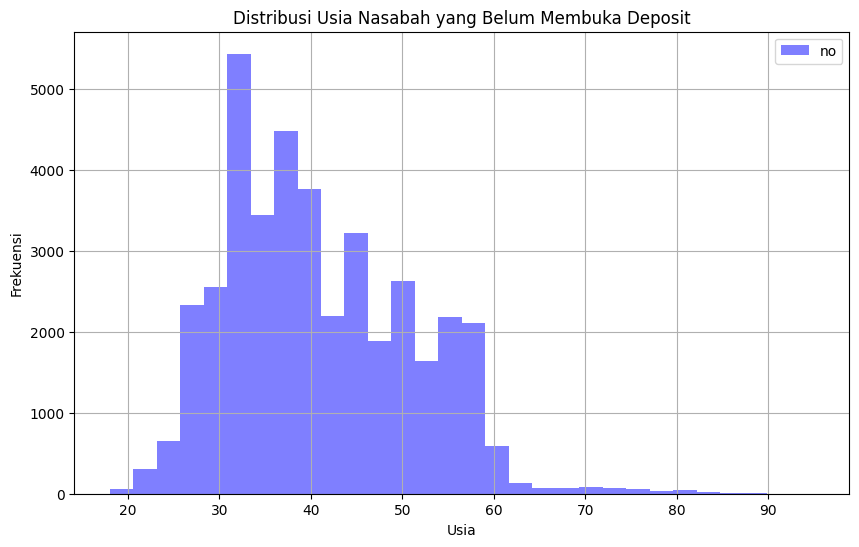

In [ ]:
plt.figure(figsize=(10, 6))
data[data['y'] == 0]['age'].hist(alpha=0.5, color='blue', bins=30, label='no')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.title('Distribusi Usia Nasabah yang Belum Membuka Deposit')
plt.legend()

## Nasabah yang belum membuka deposit rata-rata berusia 30-40 tahun.



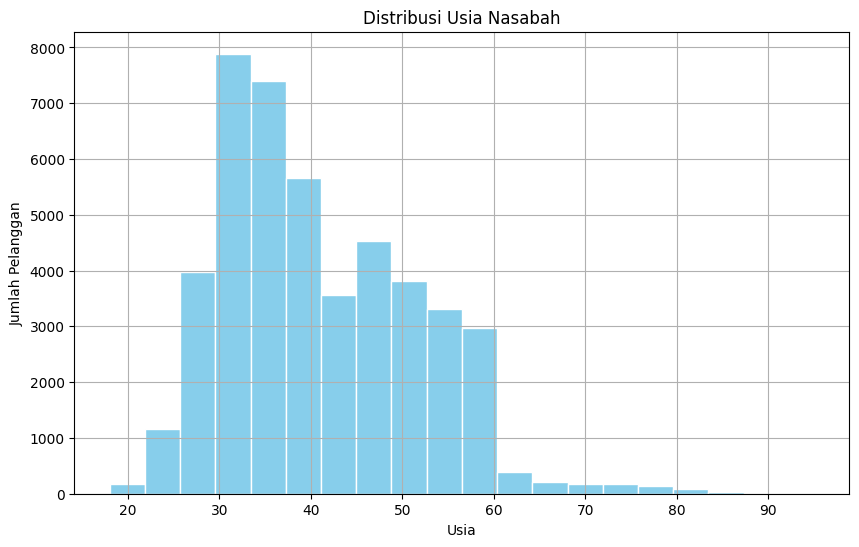

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram distribusi usia pelanggan
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='white')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Usia Nasabah')
plt.grid(True)
plt.show()


## Rata-rata usia pelanggan/nasabah ialah berusia sekitar 30 sampai 40 tahun.


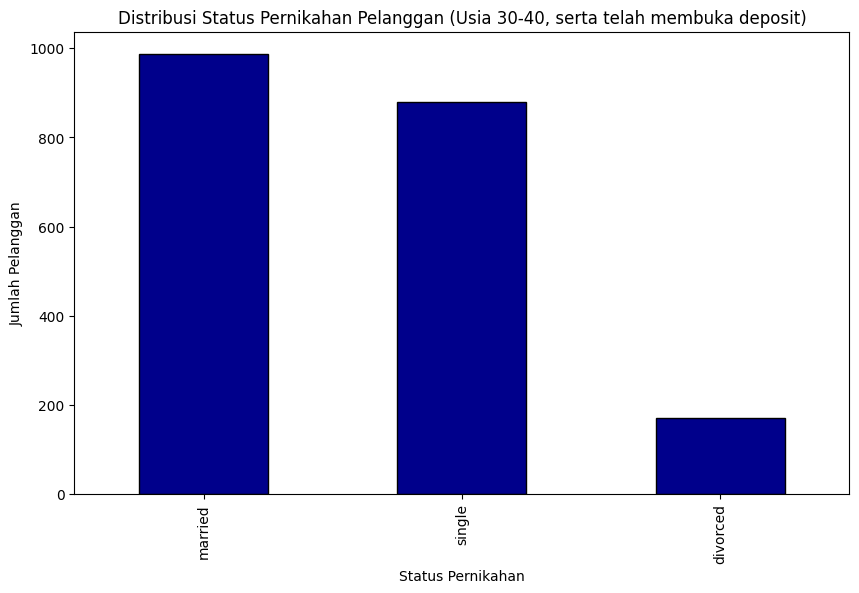

In [ ]:
# Filter DataFrame berdasarkan kriteria yang diberikan
filtered_df = data[(data['age'] >= 30) & (data['age'] <= 40) & (data['y'] == 1)]

# Membuat plot
plt.figure(figsize=(10, 6))
filtered_df['marital'].value_counts().plot(kind='bar', color='darkblue', edgecolor='black')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Status Pernikahan Pelanggan (Usia 30-40, serta telah membuka deposit)')
plt.show()

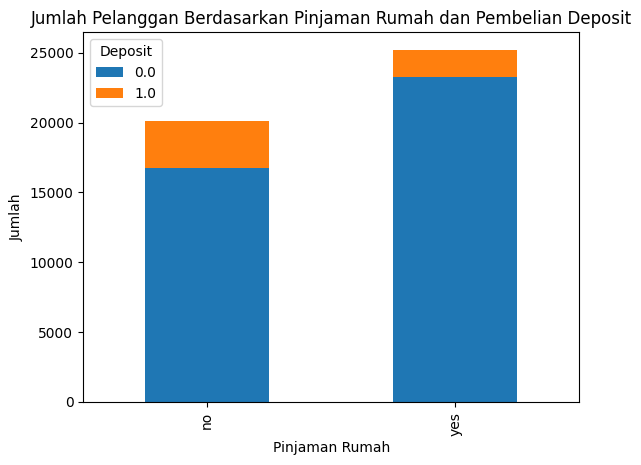

In [ ]:
housing_loan_counts = data.groupby(['housing', 'y']).size().unstack()
housing_loan_counts.plot(kind='bar', stacked=True)
plt.xlabel('Pinjaman Rumah')
plt.ylabel('Jumlah')
plt.title('Jumlah Pelanggan Berdasarkan Pinjaman Rumah dan Pembelian Deposit')
plt.legend(title='Deposit')

## Pelanggan yang memiliki housing loan (pinjaman rumah) cenderung tidak memilih untuk membuka deposito.


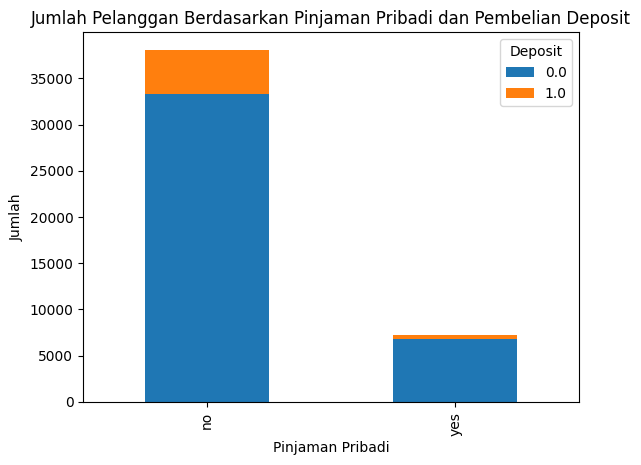

In [ ]:
personal_loan_counts = data.groupby(['loan', 'y']).size().unstack()
personal_loan_counts.plot(kind='bar', stacked=True)
plt.xlabel('Pinjaman Pribadi')
plt.ylabel('Jumlah')
plt.title('Jumlah Pelanggan Berdasarkan Pinjaman Pribadi dan Pembelian Deposit')
plt.legend(title='Deposit')

## Pelanggan yang tidak memiliki loan (pinjaman pribadi) lebih banyak yang mengambil deposito berjangka dibandingkan dengan pelanggan yang memiliki loan.


# Rekomendasi Bisnis

Berdasarkan hasil analisis dan diskusi, kami menemukan masalah yakni sedikitnya jumlah nasabah yang berlangganan deposito berjangka. Dari data, hanya 11,6% nasabah yang berlangganan.

Oleh karena itu, kami mengusulkan rekomendasi yang sekiranya relevan untuk meningkatkan konversi nasabah untuk berlangganan deposito berjangka. Berikut rekomendasi kami:
- Segmentasi target
Data menunjukan bahwa pelanggan dalam rentang usia 30-40 tahun cenderung memiliki minat yang tinggi terhadap produk deposito. Kami merekomendasikan untuk melakukan segmentasi target yang lebih spesifik pada kelompok usia ini demi meningkatkan efektivitas kampanye pemasaran.
- Fokus pada pelanggan yang tidak memiliki loan
Pelanggan yang tidak memiliki loan cenderung memiliki minat yang tinggi terhadap produk deposito. Hal tersebut bisa jadi karena mereka tidak memiliki beban keuangan, sehingga mereka bisa mengalokasikan dana pribadi mereka ke investasi, salah satunya deposito berjangka


- Fokus pada pelanggan yang tidak memiliki housing loan
Sama seperti pelanggan yang tidak memiliki pinjaman pribadi, kita dapat memberikan campaign terkait manfaat investasi sejak dini kepada pelanggan yang tidak memiliki housing loan. Harapannya, mereka bisa mengalokasikan uang yang mereka punya untuk berlangganan deposito berjangka di bank kita.
- Personalisasi komunikasi
Jika dipetakan kembali, nasabah yang cenderung memiliki minat berlangganan deposito berjangka ialah mereka yang berusia 30-40 tahun, sudah menikah, tidak memiliki beban pinjaman. Untuk itu, kita dapat membuat campaign yang lebih personal, seperti:
1. campaign untuk memberikan awareness tentang pentingnya investasi sejak ini untuk mempersiapkan dana pendidikan untuk anak.
2. merekomendasikan deposito dengan bunga tinggi sebagai tabungan membeli rumah
3. menampilkan keunggulan deposito dibanding investasi lain
